<!-- import -->

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
df=pd.read_csv('Eluvio_DS_Challenge.csv')

In [5]:
df.head(0)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category


In [29]:
df.head(100)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
95,1202579963,2008-02-09,3,0,Iran s nulcear ambitions exposed: US behind it,False,andy4443,worldnews
96,1202566445,2008-02-09,0,0,JESSICA ALBA`s way to shoot nude,False,wahabuddin,worldnews
97,1202567115,2008-02-09,0,0,AL QAEDA LEADERS ARE NOT OPERATING FROM PAKISTAN,False,wahabuddin,worldnews
98,1202588095,2008-02-09,5,0,"White House defends waterboarding, CIA can use...",False,MikaelMN,worldnews


In [6]:
df['o_18'] = df["over_18"].astype(int)

#### Counting number of over_18 vs under_18 rows

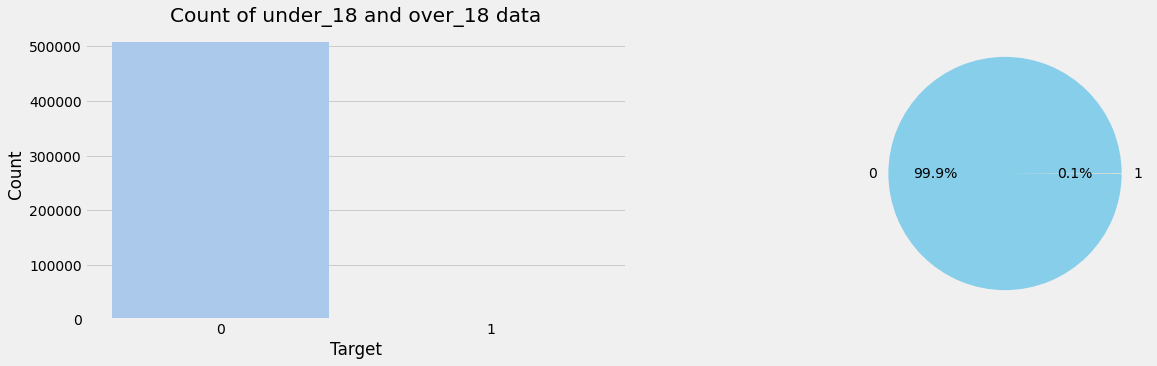

In [71]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df.o_18,ax=ax[0],palette="pastel");
g1.set_title("Count of under_18 and over_18 data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(df["o_18"].value_counts().values,explode=[0,0],labels=df.o_18.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

In [162]:
df[df.up_votes==df.up_votes.max()]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,o_18
377200,1434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews,0


<AxesSubplot:ylabel='date_created,date_created'>

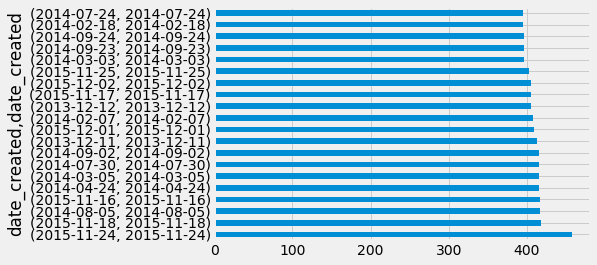

In [160]:
df.groupby('date_created').date_created.value_counts().nlargest(20).plot.barh()

#### Top-5 authors for over_18 articles

<AxesSubplot:ylabel='author,author'>

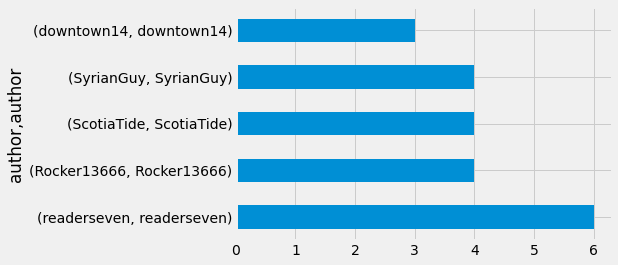

In [72]:
df[df.o_18==1].groupby('author').author.value_counts().nlargest(5).plot.barh()

#### Top-5 authors for under_18 articles

<AxesSubplot:ylabel='author,author'>

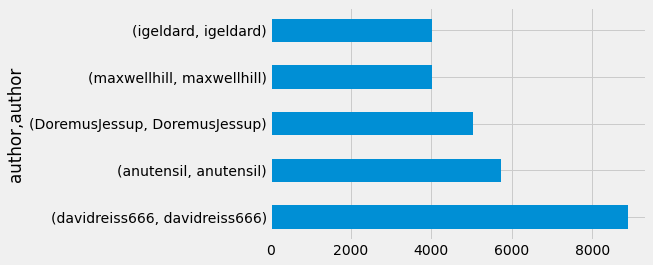

In [73]:
df[df.o_18==0].groupby('author').author.value_counts().nlargest(5).plot.barh()

In [74]:
len(df[df.over_18==True].over_18)

320

In [77]:
len(df[df.over_18==False].over_18)

508916

#### distinct categories and their count

<AxesSubplot:ylabel='category,category'>

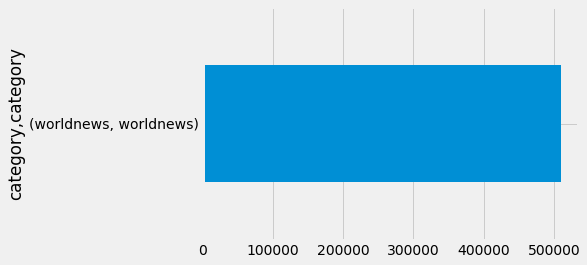

In [157]:
df.groupby('category').category.value_counts().plot.barh()

#### some imports for cleaning the data

In [78]:
from bs4 import BeautifulSoup
import re
import string 
import nltk

In [79]:
nltk.download('punkt')
nltk.download("stopwords")   
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/girishpandit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/girishpandit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/girishpandit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords  
import unicodedata, contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#### Custom class with series of transformations to be applied on `title` to do some further analysis

In [81]:
class cleantext():
    
    def __init__(self, text = "test"):
        self.text = text
        
    def strip_html(self):
        soup = BeautifulSoup(self.text, "html.parser")
        self.text = soup.get_text()
        return self

    def remove_between_square_brackets(self):
        self.text = re.sub('\[[^]]*\]', '', self.text)
        return self

    def remove_numbers(self):
        self.text = re.sub('[-+]?[0-9]+', '', self.text)
        return self

    def replace_contractions(self):
        """Replace contractions in string of text"""
        self.text = contractions.fix(self.text)
        return self
    
    def get_words(self):
        self.words = nltk.word_tokenize(self.text)
        return self

    def remove_non_ascii(self):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        self.words = new_words
        return self

    def to_lowercase(self):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = word.lower()
            new_words.append(new_word)
        self.words = new_words
        return self

    def remove_punctuation(self):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        self.words = new_words
        return self

    def replace_numbers(self):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in self.words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        self.words = new_words
        return self

    def remove_stopwords(self):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in self.words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        self.words = new_words
        return self

    def stem_words(self):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in self.words:
            stem = stemmer.stem(word)
            stems.append(stem)
        self.words = stems
        return self

    def remove_stopwords_and_lemmatization(self):
        final_text = []
        text = self.words
        for word in text:
            print(word)
            word = word.lower()
            if word not in set(stopwords.words('english')):
                lemma = nltk.WordNetLemmatizer()
                word = lemma.lemmatize(word) 
                final_text.append(word)
        self.words = ' '.join(final_text)
        return self
    
    def lemmatize_verbs(self):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in self.words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        self.words = lemmas
        return self
    
    def join_words(self):
        self.words = ' '.join(self.words)
        return self
    
    def remove_empty_words(self):
        self.words = list(filter(None, self.words))
        return self
    
    def do_all(self, text):
        
        self.text = text
        self = self.strip_html()
        self = self.remove_numbers()
        self = self.replace_contractions()
        self = self.get_words()
        self = self.remove_punctuation()
        self = self.remove_non_ascii()
        self = self.remove_stopwords()
#         self = self.stem_words()
        self = self.lemmatize_verbs()
        self = self.join_words()
        
        return self.words

In [82]:
ct = cleantext("test")

In order to speed up processing, using the [dask](https://docs.dask.org/en/latest/) library

In [30]:
import dask.dataframe as dd
from dask.multiprocessing import get
import timeit

In [31]:
def dask_this(df):
    df['clean_title'] = df['title'].apply(ct.do_all)
    return df

#### Converting `pandas` dataframe into `dask dataframe`

In [83]:
# ddata = dd.from_pandas(df[:100000],npartitions=10)
ddata = dd.from_pandas(df[df.o_18==1], npartitions=10)

In [84]:
ddata.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 320 entries, 1885 to 508706
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   time_created  320 non-null      int64
 1   date_created  320 non-null      object
 2   up_votes      320 non-null      int64
 3   down_votes    320 non-null      int64
 4   title         320 non-null      object
 5   over_18       320 non-null      bool
 6   author        320 non-null      object
 7   category      320 non-null      object
 8   o_18          320 non-null      int64
dtypes: object(4), bool(1), int64(4)

##### using the dask scheduler to run the cleansing of data with 10 parallel workers. Returns a new dataset `res` with `clean_title` column

In [87]:
import time
start_time = time.time()
res = ddata.map_partitions(dask_this).compute(scheduler='processes', num_workers=10)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.355011701583862 seconds ---


In [88]:
res.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,o_18,clean_title
1885,1206381438,2008-03-24,189,0,Pics from the Tibetan protests - more graphic ...,True,pressed,worldnews,1,Pics Tibetan protest graphic Wikileaks nsfw gr...
6721,1211138718,2008-05-18,5,0,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",True,alllie,worldnews,1,MI link Max Mosley Nazistyle sadomasochistic s...
8414,1212694925,2008-06-05,0,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch,worldnews,1,Tabloid Horrifies Germany Poland Yellow Press ...
12163,1216672016,2008-07-21,0,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch,worldnews,1,Love Parade Dortmund Techno Festival Breaks Re...
12699,1217381380,2008-07-30,5,0,IDF kills young Palestinian boy. Potentially N...,True,cup,worldnews,1,IDF kill young Palestinian boy Potentially NSFW


#### forming the word cloud of words found in the `clean title` column

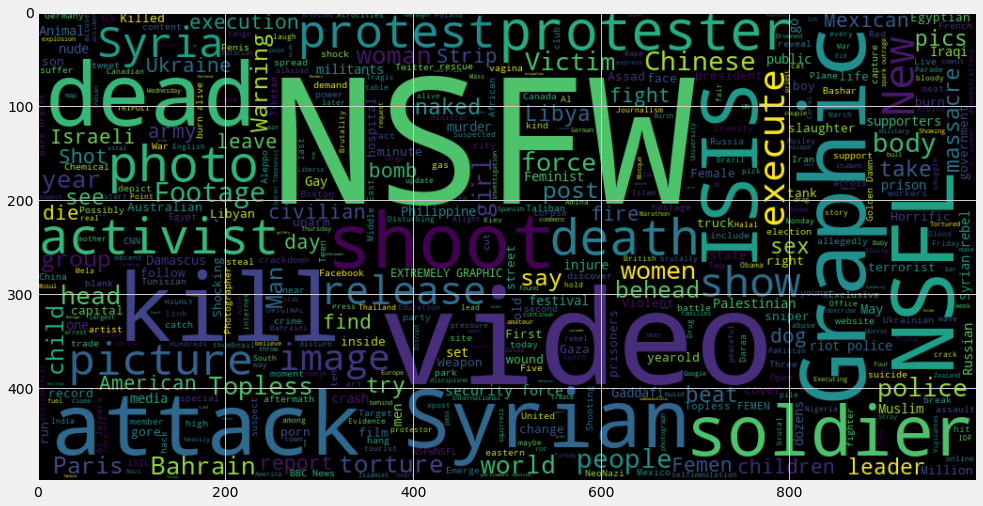

In [89]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(res.clean_title))
plt.imshow(wc , interpolation = 'bilinear')

##### function to draw a barplot of n-gram of words 

In [90]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

In [91]:
texts = ' '.join(res.clean_title)
string = texts.split(" ")

        word  count
0    (NSFW,)    111
1   (Video,)     24
2    (kill,)     24
3  (Syrian,)     23
4   (video,)     22


<AxesSubplot:xlabel='count', ylabel='word'>

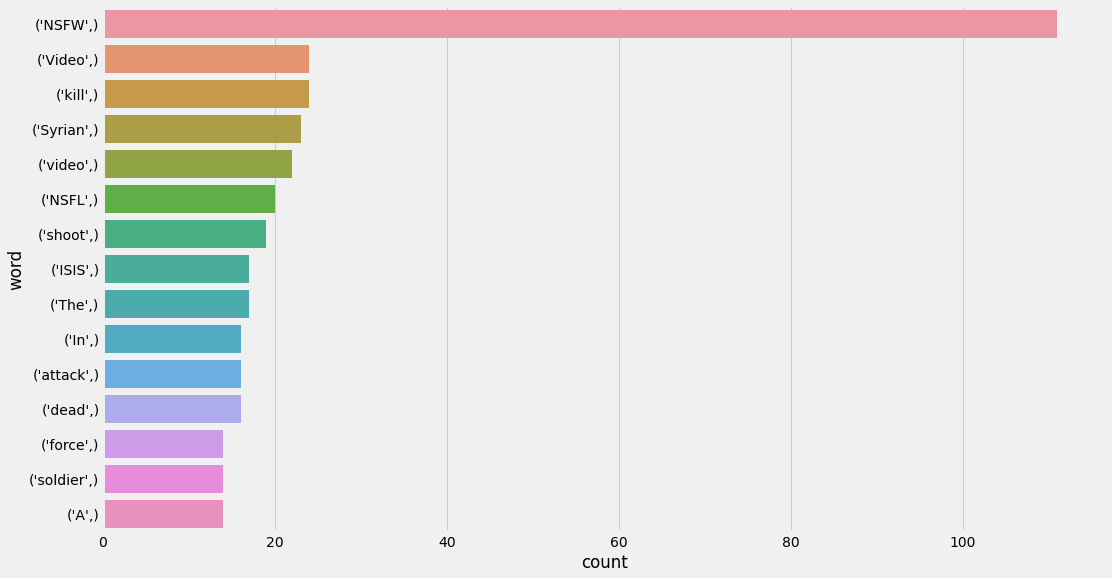

In [93]:
draw_n_gram(string, 1)

                word  count
0  (security, force)      6
1          (NSFW, A)      5
2     (NSFW, Syrian)      5
3    (NSFW, Graphic)      4
4     (riot, police)      4


<AxesSubplot:xlabel='count', ylabel='word'>

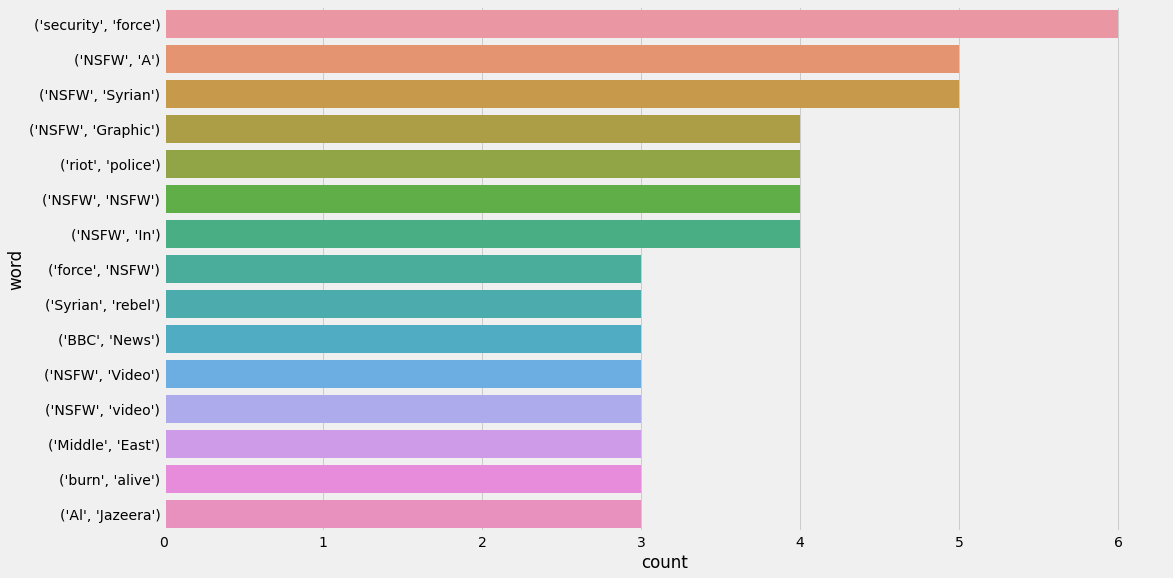

In [94]:
draw_n_gram(string,2)

                        word  count
0    (riot, police, Bahrain)      2
1  (Syrian, security, force)      2
2  (Rights, Group, Releases)      2
3   (Group, Releases, Video)      2
4        (East, Al, Jazeera)      2


<AxesSubplot:xlabel='count', ylabel='word'>

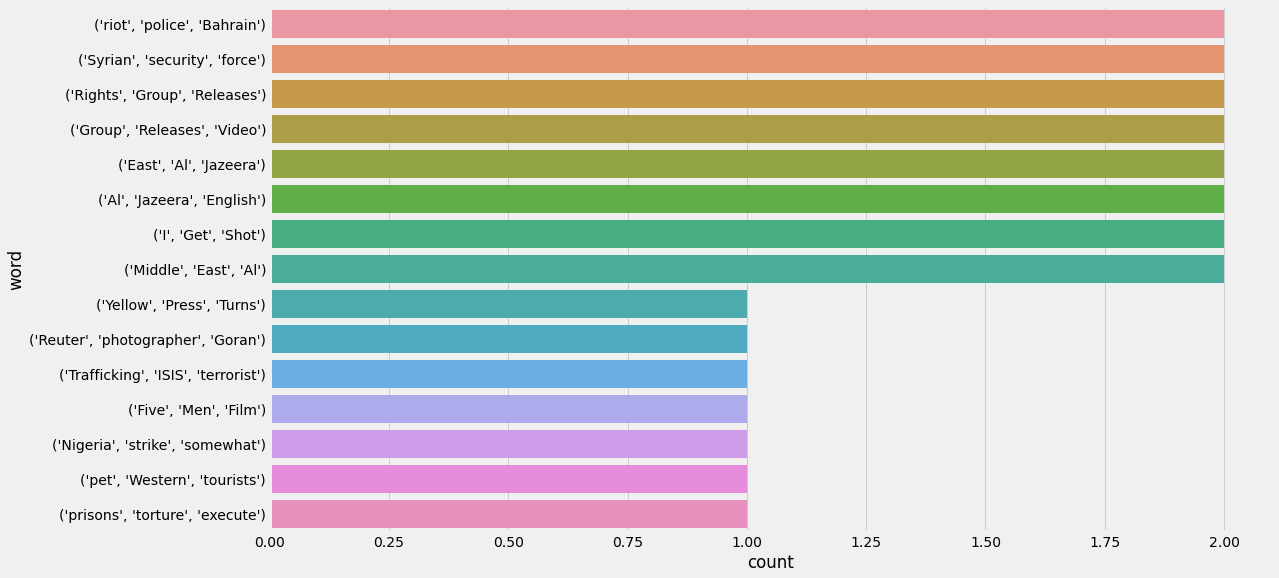

In [95]:
draw_n_gram(string,3)

* As we can see for one-gram word `NFSW` dominates for the over 18 category. Similarly `ISIS`, `Syria`, `kill` and `shoot` lemmanized words also dominate the one-gram
* For the two-gram words we can see `NFSW` joined with other words dominates the list
* As for the three-gram words we start to see a good pattern for the words that leads to classification of title as over 18

In [96]:
res.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,o_18,clean_title
1885,1206381438,2008-03-24,189,0,Pics from the Tibetan protests - more graphic ...,True,pressed,worldnews,1,Pics Tibetan protest graphic Wikileaks nsfw gr...
6721,1211138718,2008-05-18,5,0,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",True,alllie,worldnews,1,MI link Max Mosley Nazistyle sadomasochistic s...
8414,1212694925,2008-06-05,0,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch,worldnews,1,Tabloid Horrifies Germany Poland Yellow Press ...
12163,1216672016,2008-07-21,0,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch,worldnews,1,Love Parade Dortmund Techno Festival Breaks Re...
12699,1217381380,2008-07-30,5,0,IDF kills young Palestinian boy. Potentially N...,True,cup,worldnews,1,IDF kill young Palestinian boy Potentially NSFW


#### Can we model a LSTM model that can classify any random sort of title as over/under 18 based on words ?

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [138]:
df_u18 = df[df.o_18==0][:400]
df1 = pd.concat([df_u18, df[df.o_18==1]])

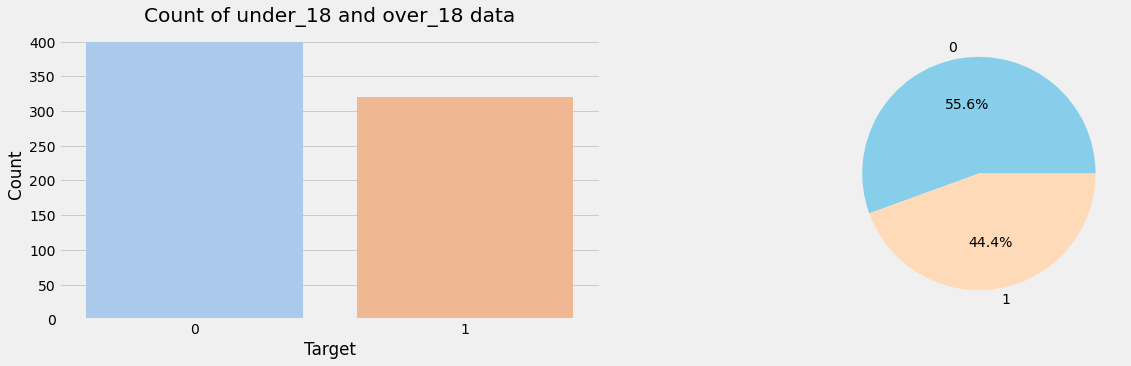

In [139]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df1.o_18,ax=ax[0],palette="pastel");
g1.set_title("Count of under_18 and over_18 data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(df1["o_18"].value_counts().values,explode=[0,0],labels=df1.o_18.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

In [140]:
ddata = dd.from_pandas(df1, npartitions=10)
start_time = time.time()
res = ddata.map_partitions(dask_this).compute(scheduler='processes', num_workers=10)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.514194965362549 seconds ---


#### using the sklearn train_test_split, split the data on `clean_title` and `o_18`

In [143]:
X_train, X_test, y_train, y_test = train_test_split(res['clean_title'], res['o_18'], random_state=0)

In [144]:
max_features = 10000
maxlen = 300

In [145]:
import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout


In [146]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [147]:
batch_size = 1024
epochs = 10
embed_size = 100

In [148]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [150]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, shuffle=True, verbose = 1)


Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.6919 - accuracy: 0.5926 - val_loss: 0.6662 - val_accuracy: 0.5926
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.6778 - accuracy: 0.5397 - val_loss: 0.7331 - val_accuracy: 0.4074
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.7207 - accuracy: 0.4603 - val_loss: 0.6691 - val_accuracy: 0.5926
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.6744 - accuracy: 0.5423 - val_loss: 0.6488 - val_accuracy: 0.6173
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.6385 - accuracy: 0.6296 - val_loss: 0.8741 - val_accuracy: 0.4074
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.8188 - accuracy: 0.4603 - val_loss: 0.6444 - val_accuracy: 0.6296
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.6252 - accuracy: 0.6667 - val_loss: 0.7353 - val_accuracy: 0.6173
Epoch 8/10
1/1 [=========================

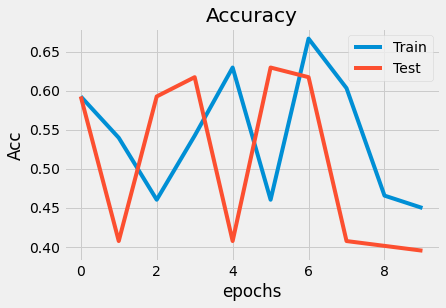

In [151]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

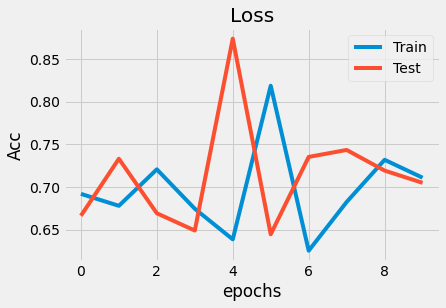

In [152]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [153]:
print(y_test.unique)

<bound method Series.unique of 146242    1
355280    1
245       0
142       0
128672    1
         ..
186314    1
306       0
77        0
393893    1
258       0
Name: o_18, Length: 180, dtype: int64>


In [154]:
pred = model.predict_classes(y_test)
print(classification_report(y_test, pred, target_names = ['o18','u18']))

              precision    recall  f1-score   support

         o18       1.00      1.00      1.00       100
         u18       1.00      1.00      1.00        80

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

